This is a study from time geek.

# Import data

- Id is used to index the data set
- diagnosis: M/B (M positive, B negative)
- the rest are the reading of MIR scan metrics

In [226]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt # basic plotting
import pandas as pd
file_dir = './breast_cancer_data.csv'
input_data = pd.read_csv(file_dir) 
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Data expolre

In [227]:
input_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


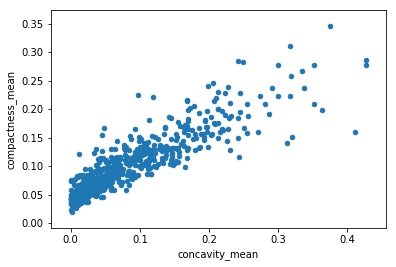

In [228]:
input_data.plot.scatter(x='concavity_mean', y='compactness_mean');

In [229]:
input_data_corr = input_data.corr()

# Data process
- Drop id
- Change label to 1 and 0
- Put label to the last column

In [230]:
# dropping the id col, which is not real info for the task
input_data_ = input_data.drop(labels=['id'],axis=1)
input_data_.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [231]:
# Rearrange the label, moving it to the end
cols = input_data_.columns.tolist()
_, c = cols[0], cols[1:]
c.append(_)
input_data_ = input_data_[c]

In [232]:
input_data_.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [233]:
# Changing label to numeric data
input_data_['diagnosis']=input_data_['diagnosis'].map({'M':1,'B':0})
input_data_.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [234]:
print([i for i in enumerate(c)])

[(0, 'radius_mean'), (1, 'texture_mean'), (2, 'perimeter_mean'), (3, 'area_mean'), (4, 'smoothness_mean'), (5, 'compactness_mean'), (6, 'concavity_mean'), (7, 'concave points_mean'), (8, 'symmetry_mean'), (9, 'fractal_dimension_mean'), (10, 'radius_se'), (11, 'texture_se'), (12, 'perimeter_se'), (13, 'area_se'), (14, 'smoothness_se'), (15, 'compactness_se'), (16, 'concavity_se'), (17, 'concave points_se'), (18, 'symmetry_se'), (19, 'fractal_dimension_se'), (20, 'radius_worst'), (21, 'texture_worst'), (22, 'perimeter_worst'), (23, 'area_worst'), (24, 'smoothness_worst'), (25, 'compactness_worst'), (26, 'concavity_worst'), (27, 'concave points_worst'), (28, 'symmetry_worst'), (29, 'fractal_dimension_worst'), (30, 'diagnosis')]


In [235]:
features_mean = list(input_data_.columns[0:9])
features_se = list(input_data_.columns[10:19])
features_worst = list(input_data_.columns[20:30])

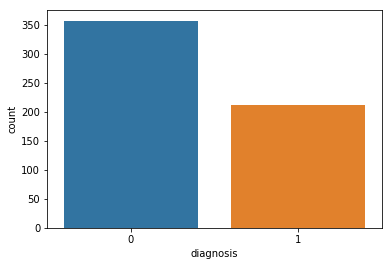

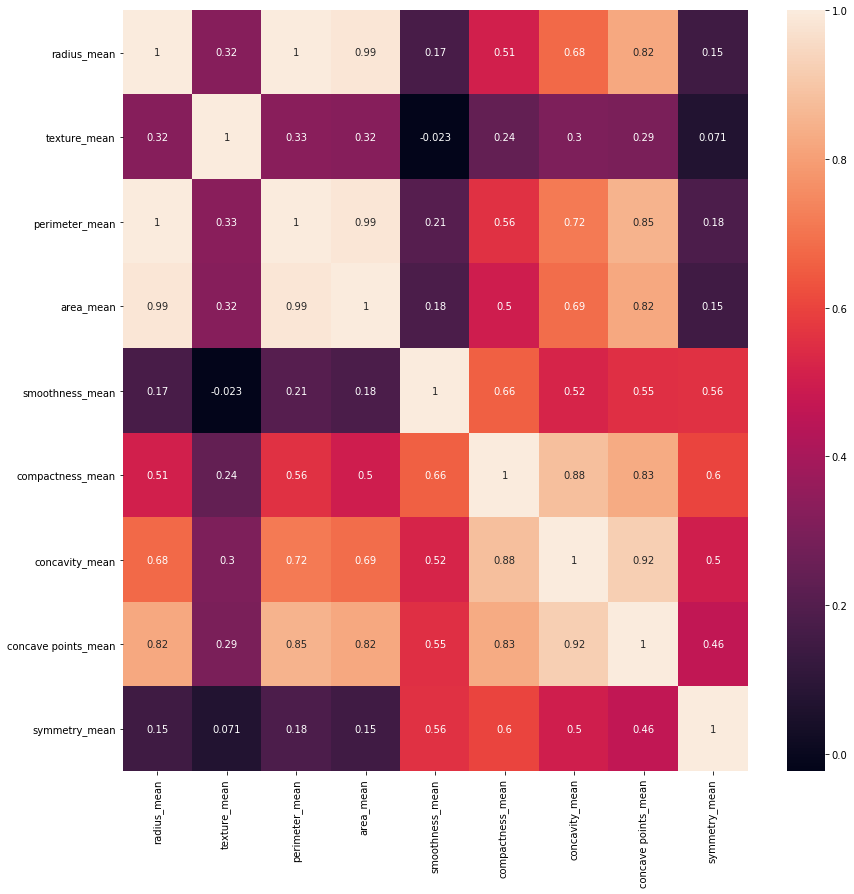

In [236]:
import seaborn as sns
sns.countplot(input_data_['diagnosis'],label="Count")
plt.show()
# 用热力图呈现 features_mean 字段之间的相关性
corr = input_data_[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()


**1. We only pick features that doesn't have correlation with other features**<br>
**2. We only pick features that measuers different object, otherwise it will be same content but different scale, in this case mean, se and worst are the same measure but different angle**

From the test result,
Test A, we use all the 29 features 
Test B, we pick features as the following

The accuracy, recall and percision are similar. However, for the Test B, the computation efficiency will be much higher.

In [237]:

features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean', 'diagnosis' ] 

input_data_feature_select = input_data_[features_remain]


In [238]:
input_data_feature_select.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,1
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,1
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,1


## Split data set

In [239]:
from sklearn.model_selection import train_test_split
def split_label(_df):
    X_ = _df.iloc[:,:-1]
    y_ = _df.iloc[:,-1]
    return X_, y_
X, y = split_label(input_data_feature_select)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, y_train.shape

((381, 6), (381,))

In [240]:
X_test.shape, y_test.shape

((188, 6), (188,))

# Build pipleline

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

- Feature enginner which is done over PCA in this case
- Model train

In [242]:
_pipe = []

p_scaler =  StandardScaler()
_pipe.append(('scaler',p_scaler))

p_pca =  PCA(n_components='mle') # it seems that PCA can't be used against the Pipeline Grid
_pipe.append(('p_pca', p_pca))

p_svc = svm.SVC(C=1, probability=True)
_pipe.append(('svc_pipe',p_svc))

svr_pipe_clf = Pipeline(_pipe)

svr_pipe_clf.fit(X_train, y_train )

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('p_pca', PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc_pipe', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

# Result Evaluation

In [243]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Evaluation on test data set

In [244]:
y_pred = svr_pipe_clf.predict(X_test)
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

('Accuracy: ', 0.9574468085106383)


array([[117,   4],
       [  4,  63]])

In [245]:
target_names = ['M', 'B']
print('\n')
print(classification_report(y_test, y_pred, target_names=target_names))



              precision    recall  f1-score   support

           M       0.97      0.97      0.97       121
           B       0.94      0.94      0.94        67

   micro avg       0.96      0.96      0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



### Evaluation on train data set

In [246]:
y_t_pred = svr_pipe_clf.predict(X_train)
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

('Accuracy: ', 0.9574468085106383)


array([[117,   4],
       [  4,  63]])

In [247]:
target_names = ['M', 'B']
print('\n')
print(classification_report(y_train, y_t_pred, target_names=target_names))



              precision    recall  f1-score   support

           M       0.93      0.97      0.95       236
           B       0.95      0.88      0.91       145

   micro avg       0.94      0.94      0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381



In [ ]:
The performance for testing and training set seems stable to each other. We don't seem to have the overfitting issue

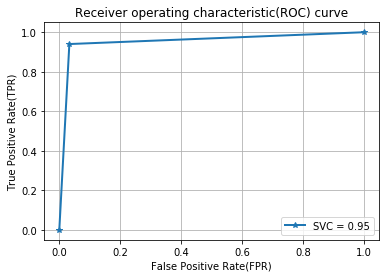

In [248]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.plot(fpr_svc, tpr_svc, '-*', lw=2, label='SVC = %0.2f'%roc_auc_svc)
plt.title('Receiver operating characteristic(ROC) curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.legend()
plt.grid()
plt.show()



# Explore of the Pipeline

In [249]:
side_pipe = []
c_scaler = ('c_scaler', svr_pipe_clf.named_steps['scaler'])
c_pca = ('c_pca',svr_pipe_clf.named_steps['p_pca'])

side_pipe.append(c_scaler)
side_pipe.append(c_pca)

side_pipe_clf = Pipeline(side_pipe)
print('Orignal data shape: ', X_train.shape)
side_pipe_clf.fit(X_train, y_train )
print('Data shape after PCA: ', side_pipe_clf.transform(X_train).shape)

('Orignal data shape: ', (381, 6))
('Data shape after PCA: ', (381, 5))
